In [1]:
from langchain_openai import ChatOpenAI
import os

In [2]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="dotenv.txt");

In [3]:
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [4]:
llm = ChatOpenAI(model="gpt-4-turbo",
                 openai_api_key = OPENAI_API_KEY,
                 #gpt-3.5-turbo-0125,
                 temperature=0)

In [5]:
%run tool_list_operators-v2.ipynb

Loaded in-cluster configuration


In [6]:
%run tool_summarize_states-v2.ipynb

In [7]:
%run tool_prometheus-v2.ipynb

In [8]:
%run tool_mlasp-v2.ipynb

/opt/app-root/lib64/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
%run tool_rag-v2.ipynb

In [10]:
tools = [tool_list_openshift_operators, tool_query_prometheus_metrics, tool_get_prometheus_metric_data_range, 
         tool_plot_prometheus_metric_data_range_as_file, tool_calculate_time_information,
         tool_summarize_pod_states, tool_summarize_service_states,
         tool_wiremock_configuration_predictor, tool_retriever
        ]

In [11]:
type(tools)

list

In [12]:
type(tool_list_openshift_operators)

function

In [13]:
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [14]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using tools to retrieve information to answer questions about OpenShift, the services and applications running inside it.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

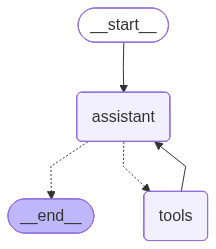

In [15]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [16]:
messages = [HumanMessage(content="hi, who are you?")]
messages = react_graph.invoke({"messages": messages})

In [17]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

hi, who are you?
================================== Ai Message ==================================

Hello! I'm an AI assistant here to help you with your questions and tasks. How can I assist you today?


In [18]:
msg = messages["messages"][-1]

In [19]:
type(msg)

langchain_core.messages.ai.AIMessage

In [21]:
msg.content

"Hello! I'm an AI assistant here to help you with your questions and tasks. How can I assist you today?"

In [17]:
messages=[HumanMessage(content="What operators are in namespace demo?")]

In [18]:
messages = react_graph.invoke({"messages": messages})

In [19]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What operators are in namespace demo?
================================== Ai Message ==================================
Tool Calls:
  tool_list_openshift_operators (call_b0UQ0D8LPITD8btFiUkAAJQU)
 Call ID: call_b0UQ0D8LPITD8btFiUkAAJQU
  Args:
    namespace: demo
================================= Tool Message =================================
Name: tool_list_openshift_operators

[{"name": "authorino-operator", "namespace": "demo", "version": "1.2.2", "status": "Succeeded"}, {"name": "kiali-operator", "namespace": "demo", "version": "2.11.3", "status": "Succeeded"}, {"name": "openshift-pipelines-operator-rh", "namespace": "demo", "version": "1.19.3", "status": "Succeeded"}, {"name": "prometheusoperator", "namespace": "demo", "version": "0.56.3", "status": "Succeeded"}, {"name": "rhods-operator", "namespace": "demo", "version": "2.22.1", "status": "Succeeded"}, {"name": "serverless-operator", "namespace": "d

In [20]:
messages["messages"][-1].pretty_print()

================================== Ai Message ==================================

In the namespace "demo", the following operators are installed:

1. **Authorino Operator**
   - Version: 1.2.2
   - Status: Succeeded

2. **Kiali Operator**
   - Version: 2.11.3
   - Status: Succeeded

3. **OpenShift Pipelines Operator RH**
   - Version: 1.19.3
   - Status: Succeeded

4. **Prometheus Operator**
   - Version: 0.56.3
   - Status: Succeeded

5. **RHODS Operator**
   - Version: 2.22.1
   - Status: Succeeded

6. **Serverless Operator**
   - Version: 1.36.0
   - Status: Succeeded

7. **Service Mesh Operator**
   - Version: 2.6.10-0
   - Status: Succeeded

8. **Tempo Operator**
   - Version: 0.16.0-2
   - Status: Succeeded


In [21]:
messages=[HumanMessage(content="What configuration of WireMock supports a throughput KPI of 307 within a 2.9 percent precision? Search for 100 epochs to find the result.")]

In [22]:
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

/opt/app-root/lib64/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mlasp-mlasp-datascience.apps.cluster-nr48j.nr48j.sandbox1693.opentlc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/app-root/lib64/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mlasp-mlasp-datascience.apps.cluster-nr48j.nr48j.sandbox1693.opentlc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/app-root/lib64/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mlasp-mlasp-datascience.apps.cluster-nr48j.nr48j.sandbox1693.opentlc.com'. Adding certificate verificatio

================================ Human Message =================================

What configuration of WireMock supports a throughput KPI of 307 within a 2.9 percent precision? Search for 100 epochs to find the result.
================================== Ai Message ==================================
Tool Calls:
  tool_wiremock_configuration_predictor (call_ow2IbX1HAb6Aa7YE8e55nvu0)
 Call ID: call_ow2IbX1HAb6Aa7YE8e55nvu0
  Args:
    epochs: 100
    KPI_value: 307
    precision: 2.9
================================= Tool Message =================================
Name: tool_wiremock_configuration_predictor

{"Parameters": {"asyncResp": 1, "asyncRespThreads": 10, "cThreads": 206, "jacptQSize": 1614, "jacptThreads": 141, "ltTargetSize": 10, "numConnections": 32, "timeoutSeconds": 3}, "Deviation": 1.5285337592719506, "Prediction": 311.6925986409649}
================================== Ai Message ==================================

The configuration of WireMock that supports a throughput KPI 

In [23]:
messages["messages"][-1].pretty_print()

================================== Ai Message ==================================

The configuration of WireMock that supports a throughput KPI of 307 within a 2.9 percent precision is as follows:

- **Async Response Enabled**: 1 (true)
- **Async Response Threads**: 10
- **Connector Threads**: 206
- **Jetty Accept Queue Size**: 1614
- **Jetty Accept Threads**: 141
- **Latency Target Size**: 10
- **Number of Connections**: 32
- **Timeout in Seconds**: 3

This configuration predicts a throughput of approximately 311.69 with a deviation of about 1.53%.


In [26]:
messages=[HumanMessage(content="Find out the Prometheus service name and port number running in namespace demo. Use it to to plot all the prometheus metric data for the metric load_generator_total_msg starting 48 hours ago until now. You must calculate the two timestamps before retrieving the metrics. Return only the filename provided by the tool and nothing else.")]
#messages=[HumanMessage(content="Find out the Prometheus service name and port number running in namespace demo.")]

In [27]:
messages = react_graph.invoke({"messages": messages})

In [28]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Find out the Prometheus service name and port number running in namespace demo. Use it to to plot all the prometheus metric data for the metric load_generator_total_msg starting 48 hours ago until now. You must calculate the two timestamps before retrieving the metrics. Return only the filename provided by the tool and nothing else.
================================== Ai Message ==================================
Tool Calls:
  tool_summarize_service_states (call_WMt0BJnY4281O5OoqEGn8y24)
 Call ID: call_WMt0BJnY4281O5OoqEGn8y24
  Args:
    namespace: demo
================================= Tool Message =================================
Name: tool_summarize_service_states

{"namespace": "demo", "svc_summary": [{"name": "influxdb", "ports": [{"port": 8086, "name": "No name available", "protocol": "TCP"}], "route": "unavailable"}, {"name": "load-generator", "ports": [{"port": 9090, "name": "metrics-app", "proto

In [25]:
messages["messages"][-2].pretty_print()

================================= Tool Message =================================
Name: tool_plot_prometheus_metric_data_range_as_file

{"file_name": "FILE-plot-load_generator_total_msg-1758040279-1758213078.png"}


In [28]:
messages=[HumanMessage(content="I want a short step by step summary on how to create a Data Science Project in OpenShift AI")]

In [29]:
messages = react_graph.invoke({"messages": messages})

In [30]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

I want a short step by step summary on how to create a Data Science Project in OpenShift AI
================================== Ai Message ==================================
Tool Calls:
  openshift_ai_documentation_search_tool (call_SCOEuxn344wAu1DkIFk5WBDJ)
 Call ID: call_SCOEuxn344wAu1DkIFk5WBDJ
  Args:
    query: create a Data Science Project in OpenShift AI
================================= Tool Message =================================
Name: openshift_ai_documentation_search_tool

CHAPTER 3. WORKING ON DATA SCIENCE PROJECTS
As a data scientist, you can organize your data science work into a single project. A data science project
in OpenShift AI can consist of the following components:
Workbenches
Creating a workbench allows you to add a Jupyter notebook to your project.
Cluster storage
For data science projects that require data to be retained, you can add cluster storage to the project.
Data connecti

In [31]:
messages["messages"][-1].pretty_print()

================================== Ai Message ==================================

Here’s a short step-by-step summary on how to create a Data Science Project in OpenShift AI:

1. **Log In**: Ensure you are logged into Red Hat OpenShift AI.

2. **Access Data Science Projects**:
   - From the OpenShift AI dashboard, click on **Data Science Projects**.

3. **Create a New Project**:
   - Click on **Create data science project**.

4. **Enter Project Details**:
   - Provide a **name** for your data science project.
   - (Optional) Edit the **resource name** to consist of lowercase alphanumeric characters, dashes, and ensure it starts and ends with an alphanumeric character.
   - Enter a **description** for your project.

5. **Finalize Creation**:
   - Click on **Create**. This will open the project details page.

6. **Enhance Your Project**:
   - From the project details page, you can create workbenches, add cluster storage, establish data connections, import pipelines, and deploy models.

7

In [32]:
messages=[HumanMessage(content="Give me a summary of the running pods in namespace demo. Please include service and route information in the response.")]

In [33]:
messages = react_graph.invoke({"messages": messages})

In [34]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me a summary of the running pods in namespace demo. Please include service and route information in the response.
================================== Ai Message ==================================
Tool Calls:
  tool_summarize_pod_states (call_8xrq1ZaQBYefSMECYGRsZOuN)
 Call ID: call_8xrq1ZaQBYefSMECYGRsZOuN
  Args:
    namespace: demo
================================= Tool Message =================================
Name: tool_summarize_pod_states

{"namespace": "demo", "pod_states": {"Succeeded": {"count": 242, "running_pods": []}, "Running": {"count": 3, "running_pods": [{"name": "influxdb-8646648598-v24ft", "service": {"name": "influxdb", "ports": [{"port": 8086, "name": "No name", "protocol": "TCP"}], "route": "unavailable"}}, {"name": "prometheus-operator-5c99989bbf-g7kxq", "service": {"name": "unavailable", "ports": [], "route": "unavailable"}}, {"name": "prometheus-prometheus-demi-0", "service": {

In [35]:
messages["messages"][-1].pretty_print()

================================== Ai Message ==================================

### Summary of Running Pods in Namespace: **demo**

#### Running Pods:
1. **Pod Name:** influxdb-8646648598-v24ft
   - **Service Name:** influxdb
   - **Ports:** 
     - Port: 8086, Protocol: TCP
   - **Route:** Unavailable

2. **Pod Name:** prometheus-operator-5c99989bbf-g7kxq
   - **Service Name:** Unavailable
   - **Ports:** None
   - **Route:** Unavailable

3. **Pod Name:** prometheus-prometheus-demi-0
   - **Service Name:** prometheus-operated
   - **Ports:** 
     - Port: 9090, Protocol: TCP (web)
     - Port: 10901, Protocol: TCP (grpc)
   - **Route:** [http://route-comparative-ptarmigan-demo.apps.cluster-nr48j.nr48j.sandbox1693.opentlc.com/](http://route-comparative-ptarmigan-demo.apps.cluster-nr48j.nr48j.sandbox1693.opentlc.com/)

#### Summary of Services:
1. **Service Name:** influxdb
   - **Ports:** 
     - Port: 8086, Protocol: TCP
   - **Route:** Unavailable

2. **Service Name:** load-generat